<a href="https://colab.research.google.com/github/yunnsss/Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%8B%A4%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인프런 크롤링**

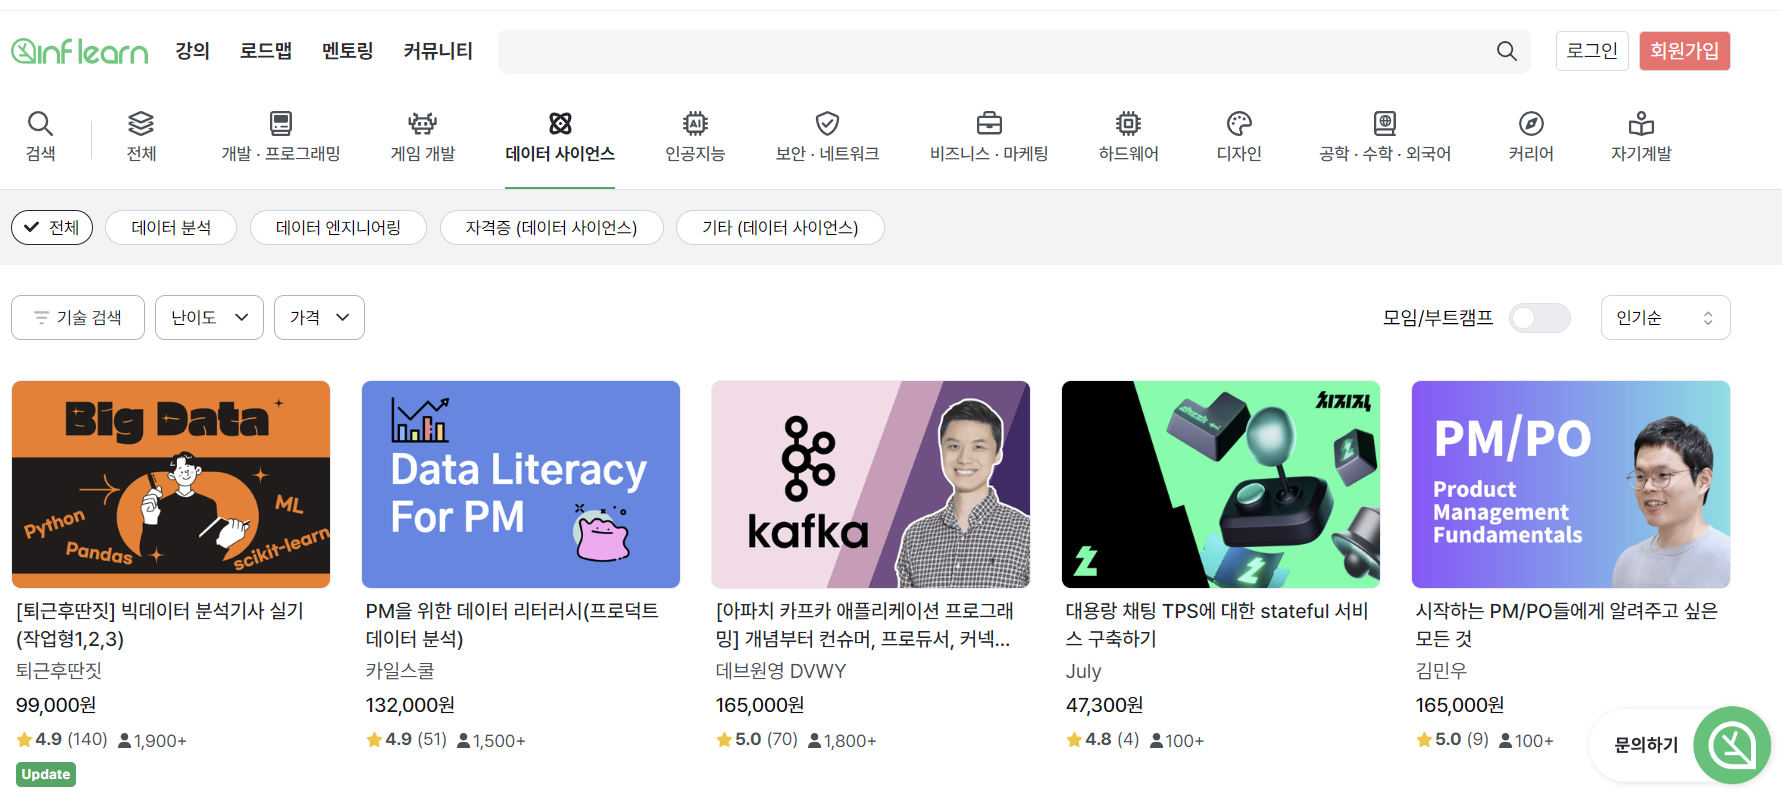

## 설치

In [ ]:
!pip install selenium
!apt-get update

# (최초 1회)
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,127 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,994 kB]
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Pack

In [ ]:
!python --version

import selenium
print(selenium.__version__)

Python 3.10.12
4.22.0


In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve

import time
import pandas as pd
import numpy as np
import chromedriver_autoinstaller  # setup chrome options

In [ ]:
chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어
chrome_options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')

chromedriver_autoinstaller.install()  # set the target URL

## 내부 페이지 크롤링하기

In [ ]:
import re

#selenium driver 로드
driver = webdriver.Chrome(options=chrome_options)

#링크 전달
driver.get("https://www.inflearn.com/course/sqld-%EC%9E%90%EA%B2%A9%EC%A6%9D-%EC%B4%88%EA%B8%89-2")

#CSS_SELECTOR를 활용해서 div 태그를 가져오기
div = driver.find_element(By.CSS_SELECTOR, "div.css-rwn1m.mantine-1jggmkl") #class명에서는 띄어쓰기는 .으로 수정

# 제목 가져오기
title = div.find_element(By.CSS_SELECTOR, "h1.mantine-Text-root.mantine-Title-root.css-1m4c0vr.mantine-17uv248")
print(title.text.split('\n')[0])

# 평점 및 리뷰 수 가져오기
star_and_num_reviews = div.find_element(By.CSS_SELECTOR, "a.mantine-Text-root.mantine-ugy335")
print(re.findall("\d.\d", star_and_num_reviews.text)[0])
print(re.findall("\d*개", star_and_num_reviews.text)[0].split('개')[0])
## GPT 질문할땐 창 내용 붙여넣기 한 후 " 여기서 평점이랑 수강평 개수 크롤링 하려면 regex 어떻게 짜야돼?" 라고 질문해보기

# 수강생 수 가져오기
num_students = div.find_element(By.CSS_SELECTOR, "p.mantine-Text-root.mantine-1nvrx8e")
print(re.findall("\d.*명", num_students.text)[0].split('명')[0])

# 강사 이름 가져오기
lecturer_name = div.find_element(By.CSS_SELECTOR, "a.mantine-Text-root.mantine-vsq1iu")
print(lecturer_name.text)

# 태그 가져오기
tags = div.find_elements(By.CSS_SELECTOR, "a.mantine-Badge-root.mantine-1ojzf7r")
for tag in tags:
  print(tag.text)

# 가격 가져오기
## GPT 질문할땐, "여기에서 가격 크롤링 하려면 어떻게해? selenium 으로 알려줘"
try:  # 할인이 없는 경우
    price = driver.find_element(By.CSS_SELECTOR, 'p.mantine-Text-root.css-6n12g.mantine-18jwzem[aria-label="정가"]')
    price_text = price.text.split('원')[0].replace(',', '')
    price_int = int(price_text)
    print(price_int)
except:
    try: # 할인이 있는 경우
        price = driver.find_element(By.CSS_SELECTOR, 'p.mantine-Text-root.mantine-1okuue1[aria-label="정가"]')
        price_text = price.text.split('원')[0].replace(',', '')
        price_int = int(price_text)
        print(price_int)
    except:
        try: # 분할 납부가 가능한 경우
            price = driver.find_element(By.CSS_SELECTOR, 'p.mantine-Text-root.mantine-j1a4p1')
            price_text = price.text.split('원')[0].replace(',', '')
            price_int = int(price_text)
            print(price_int)
        except:
            try: # 할인이 있는 경우 2
              price = driver.find_element(By.CSS_SELECTOR, 'p.mantine-Text-root.css-141ggaf.mantine-18jwzem[aria-label="정가"]')
              price_text = price.text.split('원')[0].replace(',', '')
              price_int = int(price_text)
              print(price_int)
            except:
              print("가격이 없습니다.")


# 찜하기 수 가져오기
heart = driver.find_element(By.CSS_SELECTOR, "div.mantine-SimpleGrid-root.mantine-1dfaauk > button:nth-child(2) > div > span.mantine-1bvbs5e.mantine-Button-label")
print(heart.text)

# 강의 수 및 총 시간 가져오기
lec_len_info = driver.find_element(By.CSS_SELECTOR, "div.mantine-Group-root.mantine-1n7ftt8")
print(re.findall("\d*개", lec_len_info.text)[0].split('개')[0])
print(re.findall("\(.*\)", lec_len_info.text)[0].replace("(", "").replace(")", ""))

#driver 종료
driver.quit()

SQL 개발자 (SQLD) 자격증 따기 Part.2
4.2
22
22,889
유용한IT학습
SQL
55000
284
36
18시간 31분


## 함수로 만들기

In [ ]:
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import numpy as np

def scrape_course_info(url):
    # Selenium driver 로드
    driver = webdriver.Chrome(options=chrome_options)

    # 링크 전달
    driver.get(url)

    # CSS_SELECTOR를 활용해서 div 태그를 가져오기
    div = driver.find_element(By.CSS_SELECTOR, "div.css-rwn1m.mantine-1jggmkl")

    # 정보 저장을 위한 딕셔너리 초기화
    course_info = {}

    # 제목 가져오기
    title = div.find_element(By.CSS_SELECTOR, "h1.mantine-Text-root.mantine-Title-root.css-1m4c0vr.mantine-17uv248")
    course_info['title'] = title.text.split('\n')[0]

    # 평점 및 리뷰 수 가져오기
    star_and_num_reviews = div.find_element(By.CSS_SELECTOR, "a.mantine-Text-root.mantine-ugy335")
    course_info['rating'] = re.findall("\d.\d", star_and_num_reviews.text)[0]
    course_info['num_reviews'] = re.findall("\d*개", star_and_num_reviews.text)[0].split('개')[0]

    # 수강생 수 가져오기
    num_students = div.find_element(By.CSS_SELECTOR, "p.mantine-Text-root.mantine-1nvrx8e")
    course_info['num_students'] = re.findall("\d.*명", num_students.text)[0].split('명')[0]

    # 강사 이름 가져오기
    lecturer_name = div.find_element(By.CSS_SELECTOR, "a.mantine-Text-root.mantine-vsq1iu")
    course_info['lecturer'] = lecturer_name.text

    # 태그 가져오기
    tags = div.find_elements(By.CSS_SELECTOR, "a.mantine-Badge-root.mantine-1ojzf7r")
    course_info['tags'] = [tag.text for tag in tags]

    # 가격 가져오기
    try:  # 할인이 없는 경우
        price = driver.find_element(By.CSS_SELECTOR, 'p.mantine-Text-root.css-6n12g.mantine-18jwzem[aria-label="정가"]')
        price_text = price.text.split('원')[0].replace(',', '')
        price_int = int(price_text)
    except:
        try: # 할인이 있는 경우
            price = driver.find_element(By.CSS_SELECTOR, 'p.mantine-Text-root.mantine-1okuue1[aria-label="정가"]')
            price_text = price.text.split('원')[0].replace(',', '')
            price_int = int(price_text)
        except:
            try: # 분할 납부가 가능한 경우
                price = driver.find_element(By.CSS_SELECTOR, 'p.mantine-Text-root.mantine-j1a4p1')
                price_text = price.text.split('원')[0].replace(',', '')
                price_int = int(price_text)
            except:
                try: # 할인이 있는 경우 2
                  price = driver.find_element(By.CSS_SELECTOR, 'p.mantine-Text-root.css-141ggaf.mantine-18jwzem[aria-label="정가"]')
                  price_text = price.text.split('원')[0].replace(',', '')
                  price_int = int(price_text)
                except:
                  price_int = np.nan

    course_info['price'] = price_int

    # 찜하기 수 가져오기
    heart = driver.find_element(By.CSS_SELECTOR, "div.mantine-SimpleGrid-root.mantine-1dfaauk > button:nth-child(2) > div > span.mantine-1bvbs5e.mantine-Button-label")
    course_info['hearts'] = heart.text

    # 강의 수 및 총 시간 가져오기
    lec_len_info = driver.find_element(By.CSS_SELECTOR, "div.mantine-Group-root.mantine-1n7ftt8")
    course_info['num_lectures'] = re.findall("\d*개", lec_len_info.text)[0].split('개')[0]
    course_info['total_time'] = re.findall("\(.*\)", lec_len_info.text)[0].replace("(", "").replace(")", "")

    # driver 종료
    driver.quit()

    return course_info

# 예시 사용법
course_info = scrape_course_info("https://www.inflearn.com/course/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC-%EC%8B%A4%EA%B8%B0#curriculum")
print(course_info)


{'title': '[퇴근후딴짓] 빅데이터 분석기사 실기 (작업형1,2,3)', 'rating': '4.9', 'num_reviews': '195', 'num_students': '1,936', 'lecturer': '퇴근후딴짓', 'tags': ['빅데이터분석기사', '빅데이터', 'Python', 'Pandas', '머신러닝'], 'price': 99000, 'hearts': '357', 'num_lectures': '76', 'total_time': '18시간 46분'}


## 강의 링크 리스트 가져오기

In [ ]:
import re

#selenium driver 로드
driver = webdriver.Chrome(options=chrome_options)

#URL 정보를 받을 리스트
url_list = []

#링크 전달
driver.get(f"https://www.inflearn.com/courses/data-science?sort=POPULAR&page_number=1")

#CSS_SELECTOR를 활용해서 section 태그를 가져오기
section = driver.find_element(By.CSS_SELECTOR, "#__next > main > section:nth-child(4)")

a_tags = section.find_elements(By.TAG_NAME, "a") #TAG_NAME 이 좀 더 빠름

hrefs = [a.get_attribute("href") for a in a_tags if a.get_attribute("href")]

#driver 종료
driver.quit()

In [ ]:
hrefs

['https://www.inflearn.com/course/pm-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%A6%AC%ED%84%B0%EB%9F%AC%EC%8B%9C',
 'https://www.inflearn.com/course/python-crawling-basic',
 'https://www.inflearn.com/course/%EC%95%84%ED%8C%8C%EC%B9%98-%EC%B9%B4%ED%94%84%EC%B9%B4-%EC%95%A0%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D',
 'https://www.inflearn.com/course/elasticsearch-essential',
 'https://www.inflearn.com/course/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%81%AC%EB%A1%A4%EB%A7%81-%EC%8B%A4%EC%A0%84',
 'https://www.inflearn.com/course/%EB%8C%80%EA%B7%9C%EB%AA%A8-%EC%96%B8%EC%96%B4%EB%AA%A8%EB%8D%B8-llm-part4',
 'https://www.inflearn.com/course/%EC%8B%A4%EB%A6%AC%EC%BD%98%EB%B0%B8%EB%A6%AC-%EC%97%94%EC%A7%80%EB%8B%88%EC%96%B4%EC%99%80-%ED%95%A8%EA%BB%98%ED%95%98%EB%8A%94-%EB%9E%AD%EC%B2%B4%EC%9D%B8',
 'https://www.inflearn.com/course/sql-db-mysql-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D',
 'https://www.inflearn.com/course/%ED%8C%8C%EC%

## 리스트에 대해서 각각 크롤링해오기

In [ ]:
from tqdm import tqdm

course_info_dicts = list()

# hrefs를 tqdm으로 감싸서 진행률 표시줄을 추가합니다.
for href in tqdm(hrefs, desc="Scraping course info"):
  try:
    course_info_dict = scrape_course_info(href)
    course_info_dicts.append(course_info_dict)
  except:
    pass

Scraping course info: 100%|██████████| 60/60 [11:17<00:00, 11.29s/it]


In [ ]:
inflearn_df = pd.DataFrame(course_info_dicts)

In [ ]:
inflearn_df.to_excel("inflearn_df_240710.xlsx")

In [ ]:
inflearn_df

,title,rating,num_reviews,num_students,lecturer,tags,price,hearts,num_lectures,total_time
0,PM을 위한 데이터 리터러시(프로덕트 데이터 분석),4.9,51,"1,583",카일스쿨,"[데이터 리터러시, metric hierarchy, AB test]",132000.0,765,88,14시간 8분
1,"파이썬입문과 크롤링기초 부트캠프 [파이썬, 웹, 데이터 이해 기본까지] (업데이트)",4.9,553,"6,075",잔재미코딩 DaveLee,"[Python, 웹 크롤링]",66000.0,7K,77,17시간 37분
2,"[아파치 카프카 애플리케이션 프로그래밍] 개념부터 컨슈머, 프로듀서, 커넥트, 스트...",5.0,70,"1,872",데브원영 DVWY,"[Kafka, 데이터 엔지니어링]",165000.0,719,105,13시간 13분
3,ElasticSearch Essential,4.9,38,814,강진우,[Elasticsearch],33000.0,311,19,3시간 10분
4,[2024 개정판] 이것이 진짜 크롤링이다 - 실전편 (인공지능 수익화),4.9,86,924,스타트코딩,"[Python, 웹 크롤링]",154000.0,764,61,8시간 18분
5,실리콘밸리 엔지니어와 함께하는 랭체인(LangChain),4.9,7,246,미쿡엔지니어,"[LLM, LangChain, 프롬프트엔지니어링, NLP, openai]",44000.0,89,30,3시간 22분
6,처음하는 SQL과 데이터베이스(MySQL) 부트캠프 [입문부터 활용까지] (업데이트),4.8,223,"3,362",잔재미코딩 DaveLee,"[Python, SQL, MySQL, DBMS/RDBMS, 데이터 엔지니어링]",66000.0,4K,51,10시간 8분
7,"처음하는 파이썬 데이터 분석 (쉽게! 전처리, pandas, 시각화까지 전과정 기본...",4.9,272,"3,421",잔재미코딩 DaveLee,"[Python, Pandas]",77000.0,4K,57,11시간 28분
8,실전도커: 도커로 나만의 딥러닝 클라우드 컴퓨터 만들기,5.0,8,106,다니엘,"[Docker, 가상화, Python, 딥러닝, mlops]",77000.0,119,65,9시간 50분
9,실리콘밸리 엔지니어와 함께하는 Apache Airflow,4.8,18,291,미쿡엔지니어,"[airflow, 빅데이터, 데이터 엔지니어링, Python]",44000.0,104,20,2시간 48분
